<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [318]:
dataset = pd.read_excel('.\personality2.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\carla\AppData\Local\Temp\ipykernel_12156\2974395868.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_excel('.\dataset2.xlsx')


1. Display the summary of all the features of the dataset using `.info()`

In [319]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         50 non-null     object
 1   Post/Share Frequently?       50 non-null     int64 
 2   Active in social media?      50 non-null     int64 
 3   Replies to comments?         50 non-null     int64 
 4   Number of friends/followers  50 non-null     int64 
 5   Personality                  50 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.5+ KB


2. Display the total number of samples from each label using `.value_counts()`

In [320]:
dataset.value_counts()

Name                         Post/Share Frequently?  Active in social media?  Replies to comments?  Number of friends/followers  Personality
Aldrin Galvez                1                       1                        1                     1453                         1              1
Mhaigne Ahne Voces Lucañas   1                       1                        0                     896                          0              1
Joejean Alonzo               1                       1                        1                     954                          1              1
Joshua Balaoro               0                       0                        0                     287                          0              1
Joy Panganiban               0                       0                        0                     785                          0              1
Kate Poblete                 1                       1                        1                     4700                         

In [321]:
dataset.drop(columns=["Name"], inplace=True)

## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [322]:
X = dataset.drop(columns = ['Personality']).values
# X = dataset.drop(columns = ['Post/Share Frequently?', 'Active in social media?', 'Replies to comments?', 'Number of friends/followers']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [323]:
y = dataset['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 5)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [325]:
knn = KNeighborsClassifier(n_neighbors = 15)

7. Train the model using the `.fit()`

In [326]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

8. Test the model using the `.predict()`

In [327]:
prediction = knn.predict(X_test)
metrics.accuracy_score(y_test, prediction)

0.7

## Evaluate the model

9. Create a confusion matrix

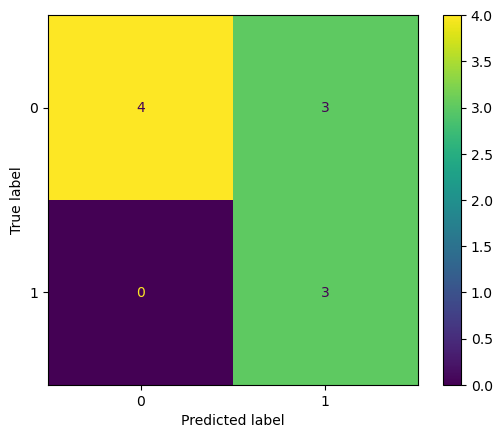

In [329]:
conf_matrix = confusion_matrix(prediction, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [330]:
metrics.accuracy_score(y_test, prediction)

0.7

11. Display the precision

In [331]:
precision = precision_score(y_test, prediction, average=None)
print("Precision:", precision)

Precision: [0.57142857 1.        ]


12. Display the recall

In [332]:
# Calculate recall
recall = recall_score(y_test, prediction, average=None)
print("Recall:", recall)

Recall: [1.  0.5]


13. Display the f1-score

In [333]:
f1 = f1_score(y_test, prediction, average=None)
print("f1-score:", f1)



f1-score: [0.72727273 0.66666667]


In [334]:
print(knn.predict([[0, 1, 0, 1000]]))

[0]
